In [1]:
from config import *

In [2]:
print(f'{year}年{month}月')

2020年3月


# Developer Salary in First-Tier Cities 程序员工资调查
我在4月1日到3日之间，抓取了某招聘网站的软件和互联网类招聘数据40万条，其中通过程序判断为程序员的14万条。地域方面，我选择了24个主要城市。不过本文只以一线城市为研究对象。这样是为了和我2017年6月的数据做对比。

提到2017年的文章，现在居然还有很多人，把这篇文章拿出来炒作。对于社会来说，可气的是，他们直接把2017改成2019，就发表了，这不是骗人么？！对于我来说，可气的是，他们转载居然还冒充是原创，是可忍熟不可忍！

In [3]:
import pandas as pd
import sys
sys.path.append('..')
sys.path.append('../py')
sys.path.append('../../py')
import db
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
import scipy.stats as stats
import numpy as np
import weighted
%matplotlib inline

In [4]:
conn=db.get_conn()
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and city in ('北京','上海','广州','深圳')  and monthly_salary<80000", con=conn)
conn.close()

In [6]:
#del data['publish_date']
#del data['published_on_weekend']
#del data['title']
#del data['title']
#del data['company_title']
#del data['company_description']
#del data['job_description']
#del data['job_id']

In [7]:
data=data.sort_values(by='headcount', ascending=False)
data.head()

,job_id,monthly_salary,headcount,title,zhinengleibie,career,real_province,province,city,company_description,...,bd_flink,bd_presto,bd_heron,ml_sklearn,ml_mllib,ml_tensorlayer,ml_paddlepaddle,ml_cntk,ml_theano,ml_mahout
13672,116717167,10000,200,海外业务软件工程师（2020届）,软件工程师,一般程序员,None,上海,上海,上海海隆软件有限公司成立于1989年4月，是国内著名软件企业、国家规划布局内重点软件企业。公...,...,False,False,False,False,False,False,False,False,False,False
9429,114568087,3750,151,C#软件开发工程师（雄安新区岗位）,软件工程师,一般程序员,None,北京,北京,北京其然科技有限公司，名字源于，顺 其其自 然然，主旨顺其自然、水到渠成。北京其然科技有限公...,...,False,False,False,False,False,False,False,False,False,False
3255,108834444,15000,150,Java开发工程师,软件工程师,一般程序员,None,北京,北京,大连华信计算机技术股份有限公司（简称大连华信）是一家面向全球客户提供领先的应用软件产品、信息...,...,False,False,False,False,False,False,False,False,False,False
16334,117792359,12500,100,Java中级软件工程师,软件工程师,一般程序员,None,北京,北京,长城计算机软件与系统有限公司（简称长城软件）是中国电子信息产业集团有限公司（简称中国电子）计...,...,False,False,False,False,False,False,False,False,False,False
14586,117143097,13541,99,2020届校园招聘（技术类）,软件工程师,算法工程师,None,北京,北京,富士康工业互联网股份有限公司是全球领先的通信网络设备、云服务设备、精密工具及工业机器人专业设...,...,False,False,False,False,False,False,False,False,False,False


In [8]:
def pd_weighted_mean(group, avg_name, weight_name):
    """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    In rare instance, we may not have weights, so just return the mean. Customize this if your business case
    should return otherwise.
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()


# Unilateral Stats 总体统计

有数据可知，程序员向一线城市集中的趋势非常明显。

According to the statistics, significant amount of developers are in the first tier cities.

In [9]:
data.shape

(32090, 122)

In [10]:
data.headcount.sum()

101390

In [11]:
salary_mean=weighted.weighted_mean(data.monthly_salary.values, data.headcount.values)
q=weighted.weighted_quantile(data.monthly_salary.values,[0.025,0.25,0.5,0.75,0.975], data.headcount.values)
q

array([ 5150., 11500., 15000., 20000., 37500.])

In [12]:
print(f'{year}年{month}月中国一线城市程序员的平均工资为{salary_mean:.0f}元，工资中位数为{q[2]:.0f}元，其中95%的人的工资位于{q[0]:.0f}到{q[4]:.0f}元之间。')

2020年3月中国一线城市程序员的平均工资为16619元，工资中位数为15000元，其中95%的人的工资位于5150到37500元之间。


In [13]:
print(f'In {year}, Developers in China earn {salary_mean:.0f} Yuan as average, '
      f'the median is {q[2]:.0f} Yuan, 95% of them earn between {q[0]:.0f} and {q[4]:.0f} Yuan.')

In 2020, Developers in China earn 16619 Yuan as average, the median is 15000 Yuan, 95% of them earn between 5150 and 37500 Yuan.


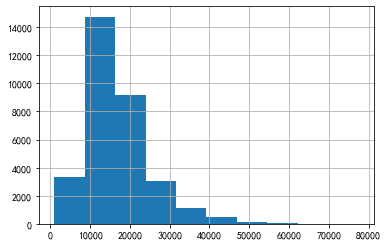

In [15]:
data.monthly_salary.hist()
plt.show()

It does not look like normal distribution.

In [16]:
from scipy import stats

In [17]:
stats.normaltest(data.monthly_salary)

NormaltestResult(statistic=9384.050777140506, pvalue=0.0)

null hypothesis: x comes from a normal distribution
    
p=0

The null hypothesis can be rejected

conclusion: data is not normally distributed.

Zoom in

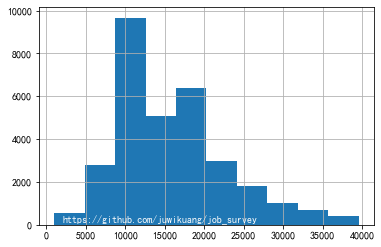

In [18]:
data[data.monthly_salary<40000].monthly_salary.hist()
plt.annotate('https://github.com/juwikuang/job_survey', xy=(0,0), xytext=(2000, 100), color='white')
plt.show()

## Role 角色

In [19]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]
    

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

def get_sub_stats_by_prefix(data, prefix):
    
    features = [feature for feature in data.columns if feature.startswith(prefix)]
    salary_mean=[]
    salary_median=[]
    salary_95_min=[]
    salary_95_max=[]
    count=[]
    
    features_out=[]
    for feature in features:
        #print(feature)
        idata=data[data[feature]==1]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(weighted.weighted_mean(values, weights))
        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_median.append(q[1])
        salary_95_min.append(q[0])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        features_out.append(feature)
    sub_data=pd.DataFrame()
    sub_data['rank']=range(0,len(features_out))
    sub_data[prefix]=[f.replace(prefix,'') for f in features_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_median']=salary_median
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)
    sub_data['rank']=range(1,len(features_out)+1)
    #sub_data=sub_data.reset_index()
    return sub_data

def apply_style(sub_data):
    return sub_data.style.hide_index().format(
    {"salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}","percentage":"{:.2%}"})

In [20]:
data_career = get_sub_stats_by_col(data,'career')
data_career.style.format({"salary_mean":"{:.0f}","salary_median":"{:.0f}","percentage":"{:.2%}"})

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
2,系统架构师,25642,6339.285714,25000,50000.000000,4950,4.88%
1,算法工程师,21605,5750.000000,20000,48000.000000,11421,11.26%
0,一般程序员,15428,5000.000000,14000,35000.000000,84870,83.71%
3,爬虫工程师,12912,2192.857143,12500,27041.666667,131,0.13%
4,生物信息工程师,11944,7000.000000,13357,15000.000000,18,0.02%


In [21]:
np.sum(data.monthly_salary * data.headcount) / data.headcount.sum()

16618.574987671367

In [22]:
data.headcount.sum()

101390

In [23]:
data.headcount.describe()

count    32090.000000
mean         3.159551
std          3.673775
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        200.000000
Name: headcount, dtype: float64

In [24]:
pd.options.display.max_columns=100


In [25]:
data.headcount.sum()

101390

# 城市

In [26]:
headcount_by_cities = data.groupby(by='city').headcount.sum()

In [27]:
headcount_by_cities


city
上海    34604
北京    18386
广州    21094
深圳    27306
Name: headcount, dtype: int64

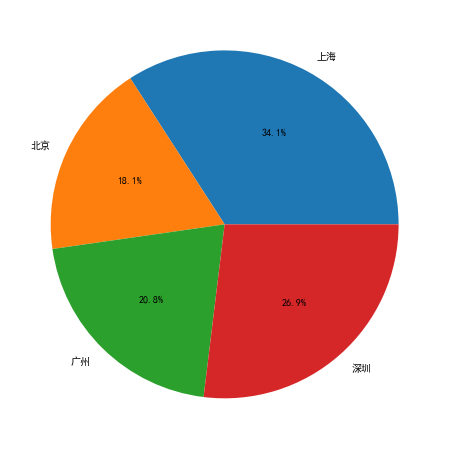

In [28]:
plt.figure(figsize=(10,8))
plt.pie(headcount_by_cities.values, labels=headcount_by_cities.index, autopct='%1.1f%%')
plt.show()

In [29]:
data_pl=get_sub_stats_by_col(data,'city')
apply_style(data_pl)

city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,18543,3750,15500,45000,18386,18.13%
上海,17114,5250,15000,37500,34604,34.13%
深圳,16912,6000,15000,37500,27306,26.93%
广州,13749,3750,12500,30000,21094,20.80%


In [30]:
salary_beijing=data[data.city=='北京'].monthly_salary
salary_shanghai=data[data.city=='上海'].monthly_salary
salary_guangzhou=data[data.city=='广州'].monthly_salary
salary_shenzhen=data[data.city=='深圳'].monthly_salary

In [31]:
stats.f_oneway(salary_beijing, salary_shanghai)

F_onewayResult(statistic=105.14462985829374, pvalue=1.3541512935623587e-24)

In [32]:
stats.f_oneway(salary_shanghai, salary_shenzhen)

F_onewayResult(statistic=24.465500561790115, pvalue=7.625976927092516e-07)

In [33]:
stats.f_oneway(salary_shenzhen, salary_guangzhou)

F_onewayResult(statistic=592.2390094071645, pvalue=1.6535043395609112e-128)

# 编程语言

In [34]:
data_pl=get_sub_stats_by_prefix(data,'pl_')
apply_style(data_pl)

rank,pl_,salary_mean,salary_median,salary_95_min,salary_95_max,head_count,percentage
1,rust,27040,29166,9238,45250,218,0.14%
2,scala,22601,20833,8000,45000,1080,0.67%
3,python,21010,18500,6250,45000,14112,8.79%
4,go,20903,18000,7000,45000,13504,8.41%
5,lua,20607,20000,6218,41666,1482,0.92%
6,r,19944,17500,5231,43437,1335,0.83%
7,matlab,19769,18222,5291,40000,2621,1.63%
8,typescript,19212,22500,3569,35000,814,0.51%
9,ruby,18797,17500,3525,37500,446,0.28%
10,perl,18714,17500,5000,40000,1079,0.67%


数据显示，haskell才是最赚钱的编程语言。python是主流语言里面最赚钱的，比java的工资多了3000元！vb是最不赚钱的了。其中，最赚钱的编程语言和最不赚钱的，工资居然差了2倍。所以，要选好编程语言呀！

# 教育

In [35]:
edu_counts=data[~(data.edu=='')].groupby(by=['edu']).headcount.sum()

In [36]:
edu_counts

edu
初中及以下        9
博士         325
大专       25175
本科       59263
硕士        3837
高中         172
Name: headcount, dtype: int64

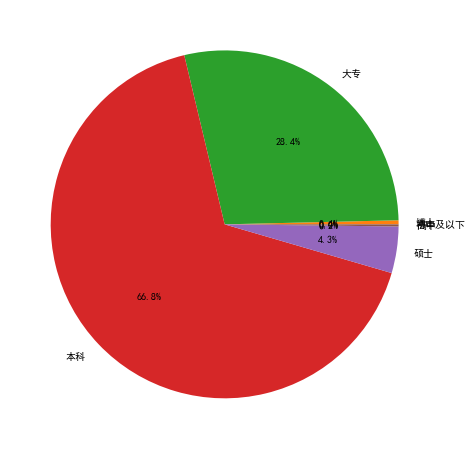

In [37]:
plt.figure(figsize=(10,8))
plt.pie(edu_counts.values, labels=edu_counts.index, autopct='%1.1f%%')
plt.show()

In [38]:
data_edu=get_sub_stats_by_col(data[data.edu.isin(['初中及以下','高中','大专','本科','硕士','博士'])], 'edu')
apply_style(data_edu)

edu,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
博士,30601,15499,30000,50000,325,0.37%
硕士,21898,4520,20000,46312,3837,4.32%
本科,17560,5250,15000,40000,59263,66.75%
大专,13880,4297,12500,30000,25175,28.36%
初中及以下,12278,9000,12500,17500,9,0.01%
高中,8336,2800,7000,24700,172,0.19%


In [39]:
salary_associate=data[data.edu=='大专'].monthly_salary
salary_bachelor=data[data.edu=='本科'].monthly_salary
salary_master=data[data.edu=='硕士'].monthly_salary
salary_phd=data[data.edu=='博士'].monthly_salary

In [40]:
print('大专，本科，硕士，博士的平均工资分别是{:.0f}，{:.0f}，{:.0f}，{:.0f}。中位数分别是{:.0f}， {:.0f}，{:.0f}， {:.0f}。'.format(
    salary_associate.mean(),salary_bachelor.mean(),salary_master.mean(),salary_phd.mean(),
    salary_associate.median(),salary_bachelor.median(),salary_master.median(),salary_phd.median()))

大专，本科，硕士，博士的平均工资分别是13661，17677，22371，30774。中位数分别是12500， 16000，20833， 29166。


In [41]:
stats.f_oneway(salary_phd, salary_master)

F_onewayResult(statistic=61.80903027445163, pvalue=7.504940867541805e-15)

In [42]:
stats.f_oneway(salary_master, salary_bachelor)

F_onewayResult(statistic=379.33743792581106, pvalue=9.82658945708907e-84)

In [43]:
stats.f_oneway(salary_bachelor, salary_associate)

F_onewayResult(statistic=1498.525075631907, pvalue=4.2457e-319)

经过Oneway Anova Test，证明从大专到博士，学历每提高一级，工资都有显著的提高。

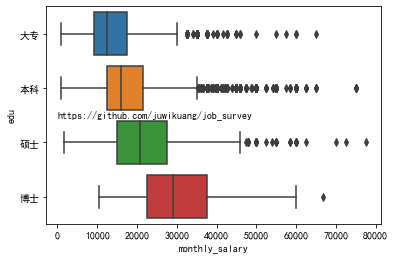

In [44]:

order=['大专','本科','硕士','博士']
a=sns.boxplot(y='edu',x='monthly_salary',order=order,data=data[data.edu.isin(order)], orient='h')
plt.annotate('https://github.com/juwikuang/job_survey', xy=(0.5,1.5), xytext=(2, 1.55))
plt.show()

# 工作经验 Working Experience

In [45]:
data_experience=get_sub_stats_by_col(data, 'experience')
apply_style(data_experience)

experience,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
10+,31247,12500,30000,55000,399,0.39%
5_10,22488,11500,20000,45000,14567,14.37%
3_5,17968,9000,15500,37500,31378,30.95%
,14534,3500,12500,36000,26951,26.58%
1_3,13861,5750,12500,30000,28095,27.71%


In [46]:
salary_we_10=data[data.experience=='10+'].monthly_salary
salary_we_5_10=data[data.experience=='5_10'].monthly_salary
salary_we_3_5=data[data.experience=='3_5'].monthly_salary
salary_we_1_3=data[data.experience=='1_3'].monthly_salary
salary_we_no=data[data.experience=='no'].monthly_salary

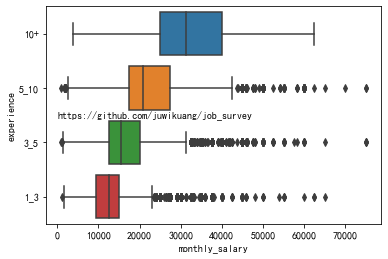

In [47]:

order=['10+','5_10','3_5','1_3']
sns.boxplot(y='experience',x='monthly_salary',order=order,data=data[data.experience.isin(order)], orient='h')
plt.annotate('https://github.com/juwikuang/job_survey', xy=(1.5,1.5), xytext=(1.55, 1.55))
plt.show()

# 公司 Company

## 公司性质 Company Type

In [48]:
data_company_type=get_sub_stats_by_col(data,'company_type')
apply_style(data_company_type)

company_type,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
外资（欧美）,19094,6855,17500,40000,5642,5.56%
国企,17279,3750,15000,45000,7072,6.98%
合资,16946,5250,15000,37500,8533,8.42%
民营公司,16372,5000,15000,37500,73744,72.73%
非营利组织,16299,4867,12875,39333,68,0.07%
外资（非欧美）,16254,5770,14000,37500,5754,5.68%
事业单位,14904,6804,14583,35000,533,0.53%
外企代表处,12545,1750,16136,22900,44,0.04%


us_eu是欧美外企，startup是创业公司，listed是上市公司，state是国企，private是私企，foreign是非欧美外企，其他不足1000个样本的不管了。

## 公司规模 Company Size

In [49]:
data_company_size=get_sub_stats_by_col(data,'company_size')
apply_style(data_company_size)

company_size,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
10000+,24938,7000,22500,50000,7011,6.91%
5000-10000,19293,7000,16000,45000,2665,2.63%
,17461,6250,15500,37744,581,0.57%
500-1000,17141,5250,15000,35000,10064,9.93%
1000-5000,17103,6000,15499,37500,12920,12.74%
150-500,16251,5250,15000,35000,24277,23.94%
50-150,15339,4500,14000,35000,30385,29.97%
50-,14419,4000,12500,35000,13487,13.30%


公司越大，工资越高

## 行业 Industry

In [50]:
data_industry=get_sub_stats_by_col(data,'industry')
apply_style(data_industry)

industry,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
logistic,19107,5680,15424,48000,1566,1.54%
finance,18092,5250,17500,36167,3472,3.42%
computer,16775,5000,15000,37500,77207,76.15%
edu,16613,6500,15000,38150,5848,5.77%
service,15630,6500,15000,30000,572,0.56%
trade,15245,5250,14000,30000,5739,5.66%
ads,14906,5889,13929,29166,1067,1.05%
gov,14893,3725,13500,32827,1285,1.27%
realestate,14851,4712,12500,37188,1385,1.37%
medical,14777,3750,14000,30000,2197,2.17%
